In [1]:
from utils.dataset import extract_datasets
from utils.config import load_datasets
from SurvSet.data import SurvLoader
from utils.eda_methods import identify_features, plot_phenotypes_analysis, survival_analysis_plots, \
    univariate_analysis, bivariate_analysis, censoring_analysis, correlation_analysis
from utils.preprocess import preprocess

In [2]:
loader = SurvLoader()
ds_lst = loader.df_ds
ds_lst.head(20)

,ds,is_td,n,n_fac,n_ohe,n_num
0,hdfail,False,52422,5,87,1
1,stagec,False,146,4,15,3
2,veteran,False,137,3,5,3
3,vdv,False,78,0,0,4705
4,AML_Bull,False,116,0,0,6283
5,LeukSurv,False,1043,2,24,5
6,zinc,False,431,11,18,2
7,burn,False,154,10,12,1
8,UnempDur,False,3241,1,1,5
9,nwtco,False,4028,5,7,2


In [3]:
# extract_datasets()

In [4]:
# view random indicies
# 8: burn, 20: cgd, 39: phpl04K8a, 56: ovarian, 73: flchain
dataset = load_datasets(names=['burn', 'cgd', 'phpl04K8a', 'ovarian', 'flchain'], folder='../outputs/datasets')


In [5]:
dataset['flchain'].head()

,pid,event,time,num_age,num_kappa,num_lambda,num_flc_grp,num_creatinine,num_sample_yr,fac_sex,fac_chapter,fac_sample_yr,fac_mgus
1837,1837,0,4837,71,0.740,1.000,1,0.6,1996,F,missing,1996,N
923,923,1,2380,77,7.930,6.290,10,1.2,1996,M,Neoplasms,1996,N
5242,5242,0,3450,58,1.510,1.440,6,0.9,2000,F,missing,2000,N
2986,2986,1,3071,67,1.190,1.240,4,1.0,1996,F,Neoplasms,1996,N
5348,5348,0,4577,59,0.989,0.319,1,0.8,1996,F,missing,1996,Y


In [6]:
# preprocessing for the cluster analysis
dataset = preprocess(dataset['burn'])

C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
dataset.head()

,fac_burn_buttock_Y,fac_burn_head_Y,fac_burn_lower_leg_Y,fac_burn_resp_Y,fac_burn_trunk_Y,fac_burn_type_flame,fac_burn_type_missing,fac_burn_type_scald,fac_burn_upper_leg_Y,fac_race_white,fac_sex_M,fac_treatment_cleanse,num_burn_area,pid,event,time
78,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.827786,78,1,2
5,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.234308,5,1,8
20,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.450118,20,0,43
40,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.234308,40,0,97
86,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.384267,86,0,67


In [8]:
dataset = identify_features(dataset)

Fitting the following Dimensionality Reduction Model:
 PCA(random_state=100)
Fitting the following Clustering Model:
 KMeans(random_state=100)


C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\johan\anaconda3\envs\research_project_auton_env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
dataset.head()

,fac_burn_buttock_Y,fac_burn_head_Y,fac_burn_lower_leg_Y,fac_burn_resp_Y,fac_burn_trunk_Y,fac_burn_type_flame,fac_burn_type_missing,fac_burn_type_scald,fac_burn_upper_leg_Y,fac_race_white,fac_sex_M,fac_treatment_cleanse,num_burn_area,pid,event,time,phenotypes
78,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,-0.827786,78,1,2,2
5,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.234308,5,1,8,0
20,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.450118,20,0,43,6
40,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.234308,40,0,97,4
86,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.384267,86,0,67,4


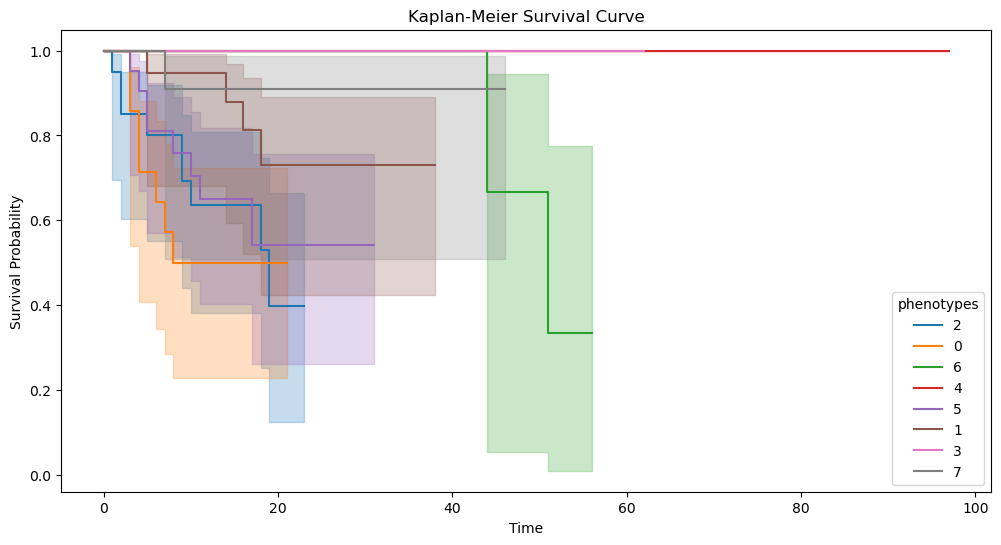

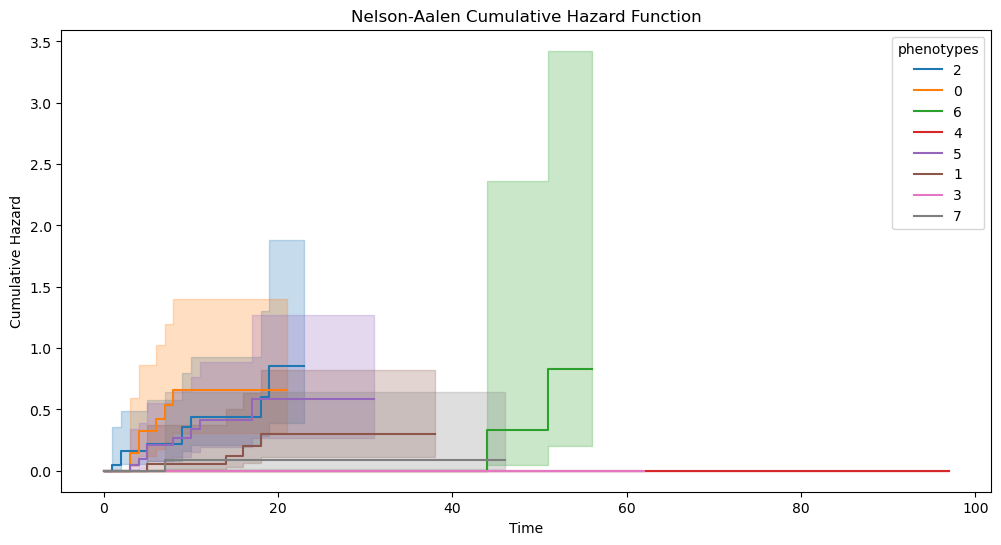

In [10]:
survival_analysis_plots(dataset, 'phenotypes')

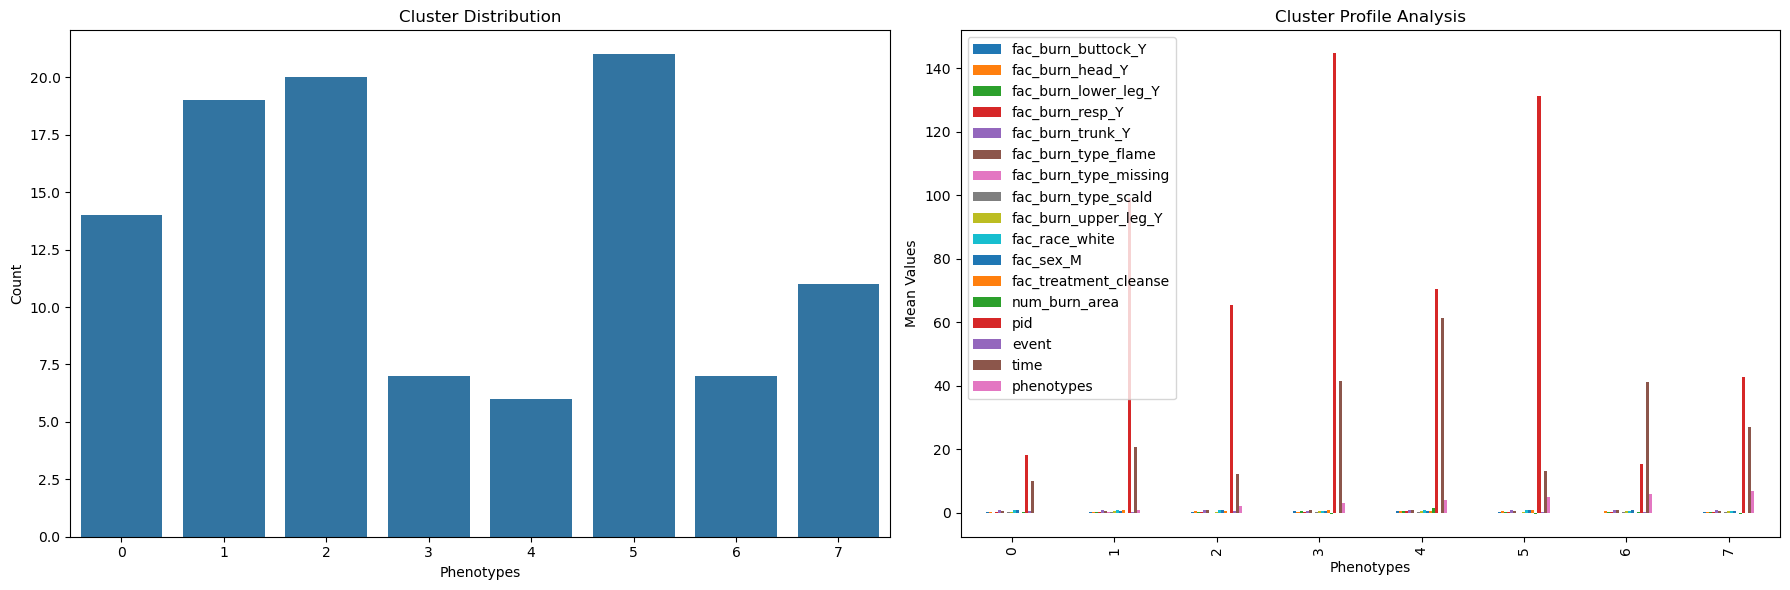

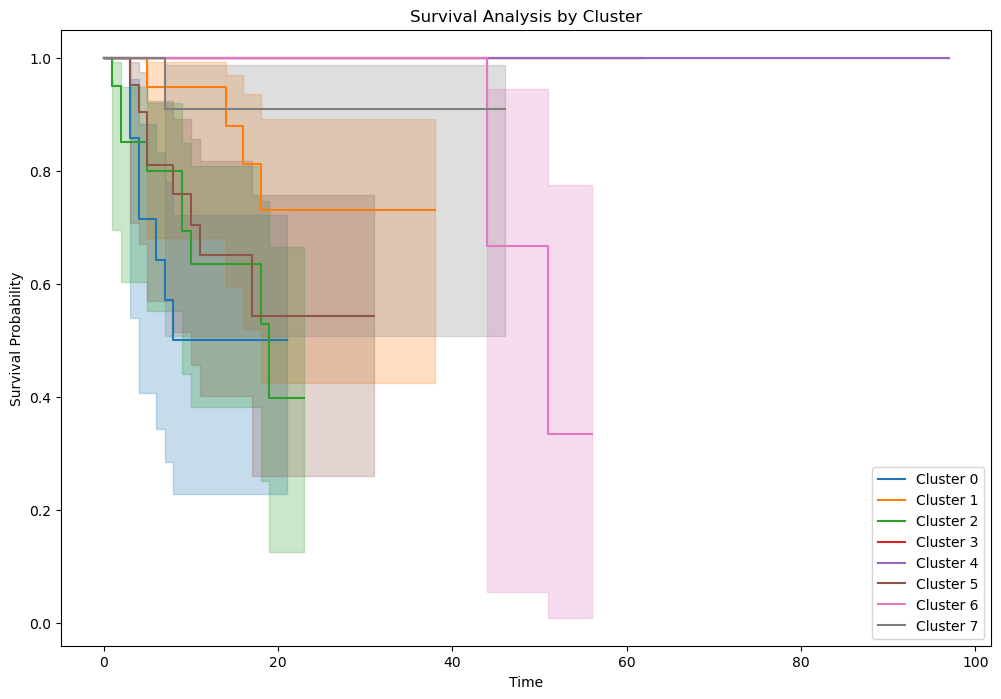

In [11]:
plot_phenotypes_analysis(dataset)


fac_burn_buttock_Y Statistics:
count    105.000000
mean       0.257143
std        0.439155
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: fac_burn_buttock_Y, dtype: float64

fac_burn_head_Y Statistics:
count    105.000000
mean       0.466667
std        0.501280
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: fac_burn_head_Y, dtype: float64

fac_burn_lower_leg_Y Statistics:
count    105.000000
mean       0.257143
std        0.439155
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: fac_burn_lower_leg_Y, dtype: float64

fac_burn_resp_Y Statistics:
count    105.000000
mean       0.314286
std        0.466457
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: fac_burn_resp_Y, dtype: float64

fac_burn_trunk_Y Statistics:
count    105.000000
mean       0.866667
std   

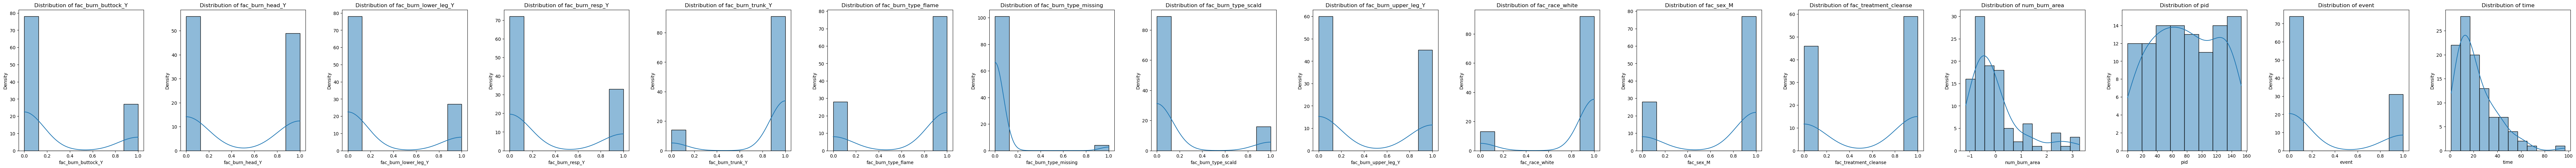

In [6]:
univariate_analysis(dataset)

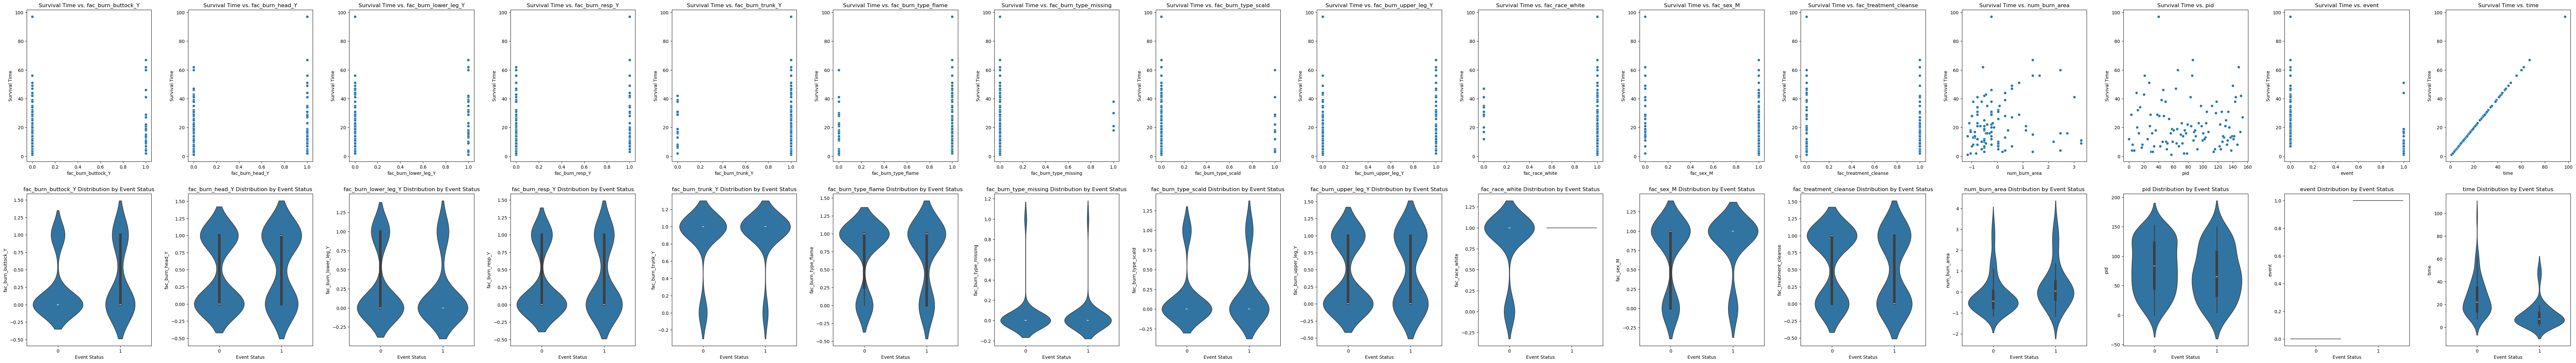

In [7]:
bivariate_analysis(dataset)


Overall Censoring Level:
event
0    0.704762
1    0.295238
Name: proportion, dtype: float64


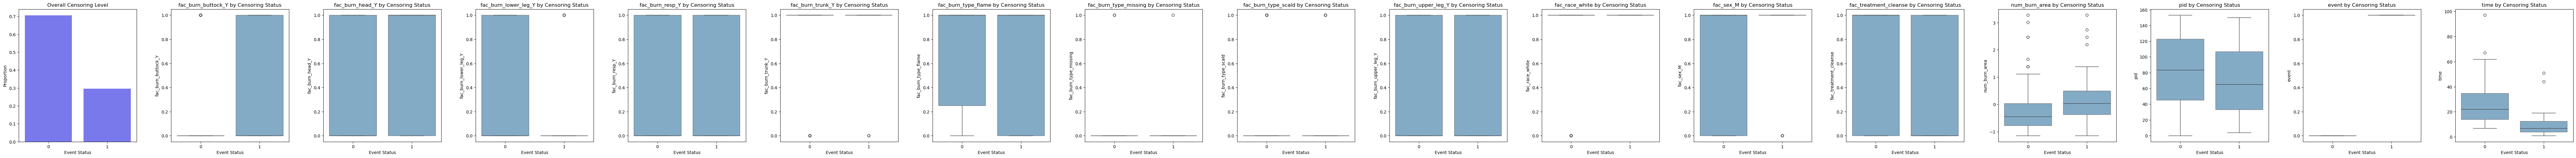

In [8]:
censoring_analysis(dataset)

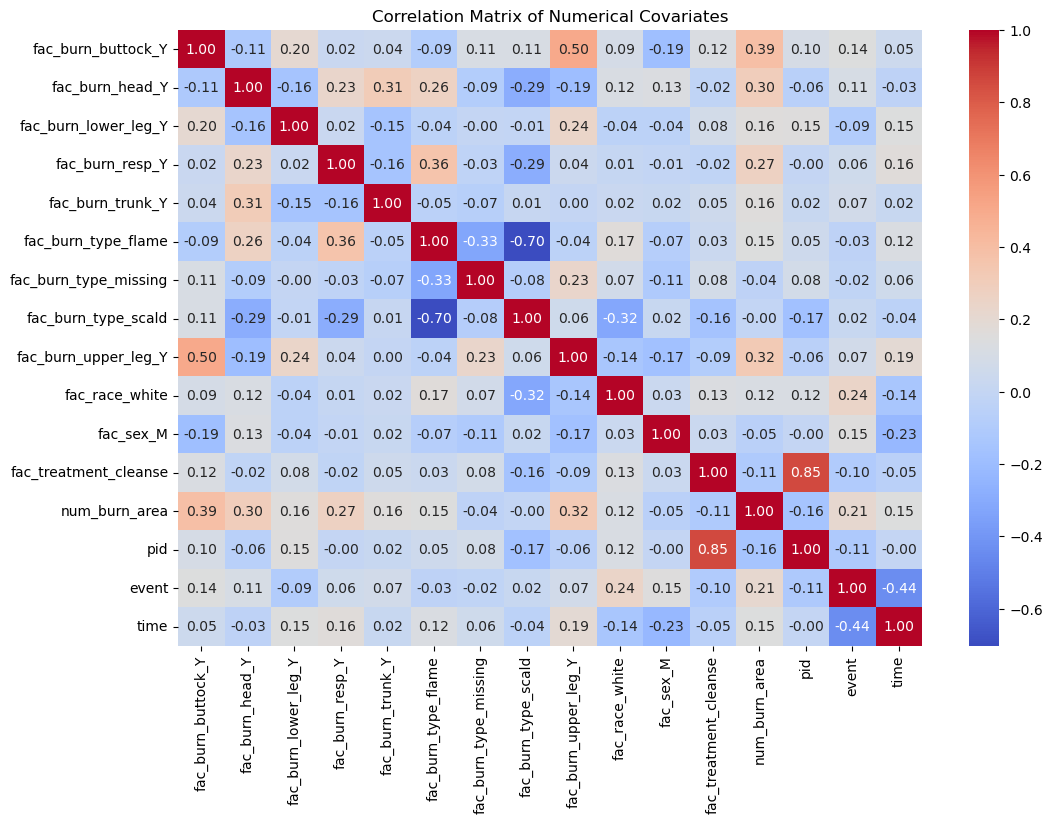

In [9]:
correlation_analysis(dataset)